In [41]:
#1. Importar as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns


In [42]:
#2. Puxar os dados do banco de dados

tabela = pd.read_csv("Dados_Exercício_2.csv")
tabela.head()


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [45]:
#3. Remover colunas inúteis para a previsão numérica do mpg

tabela = tabela.drop(["Unnamed: 0"], axis = 1)
tabela.head()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

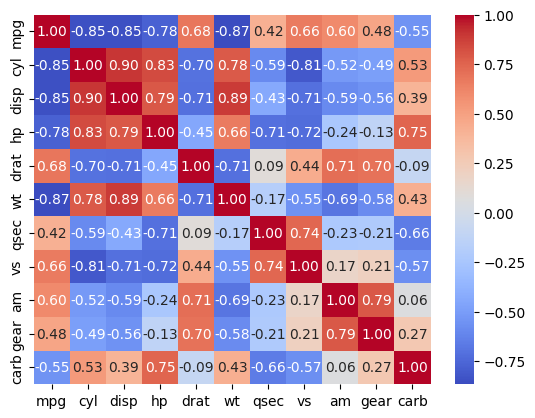

In [46]:
#4. Analisar as correlações das variáveis independente com a variável dependente, para decidirmos quais serão utilizadas

correlacao = tabela.corr()
sns.heatmap(correlacao, cmap = "coolwarm", annot = True, fmt = ".2f")


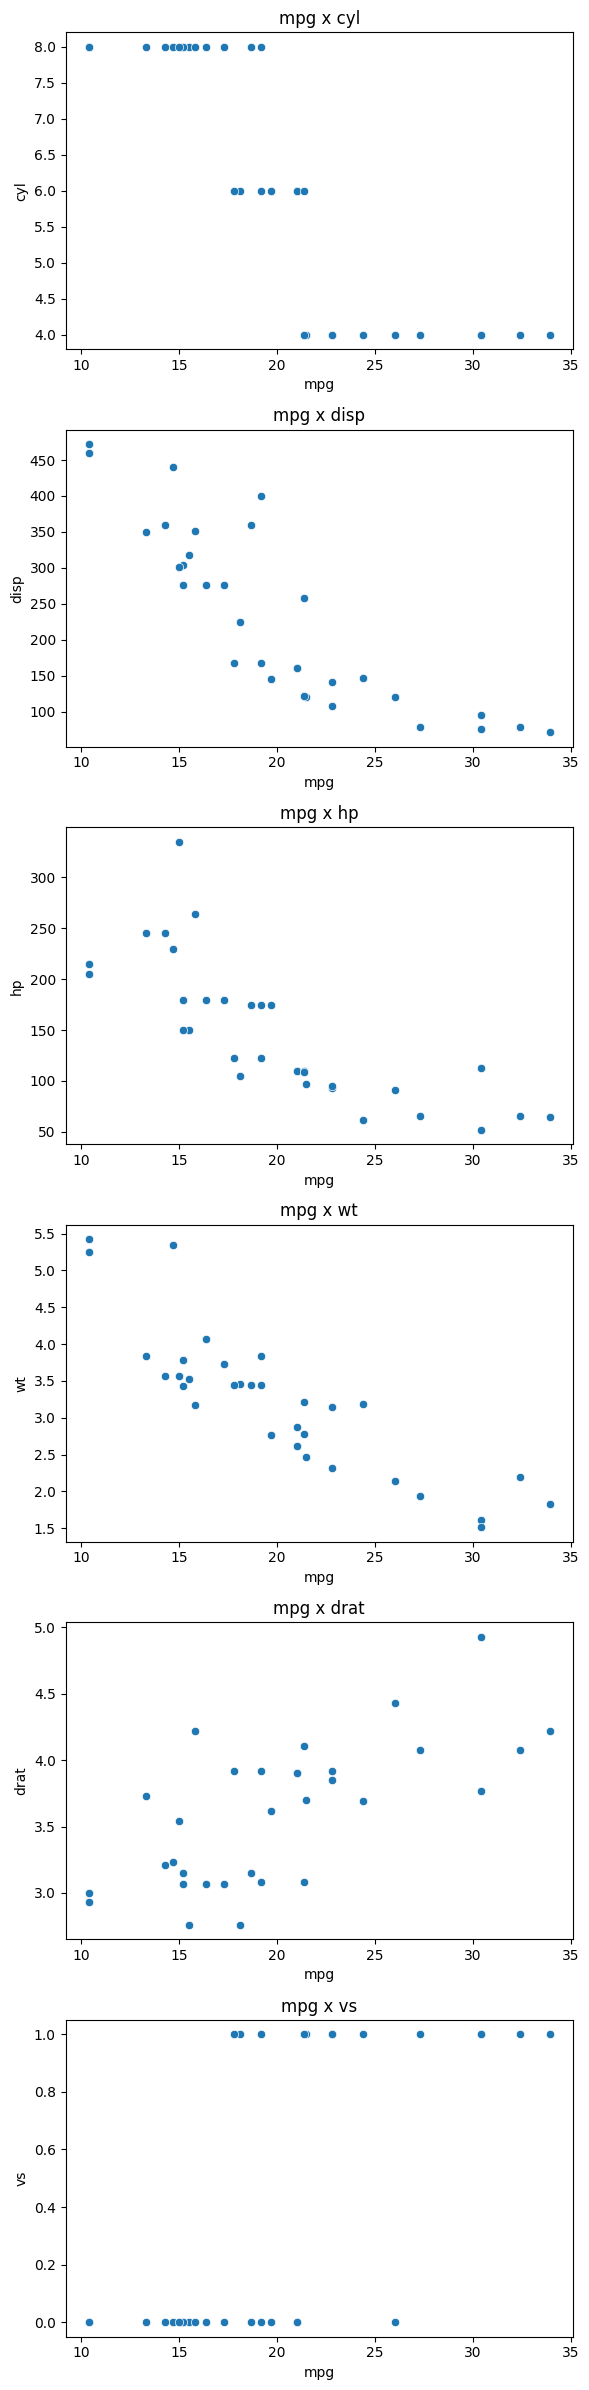

In [49]:
#5. Criar os pares das variáveis escolhidas, que de acordo com o gráfico são: cyl, disp, hp, wt, drat e vs

colunas_pares = [("mpg", "cyl"), ("mpg", "disp"), ("mpg", "hp"), ("mpg", "wt"), ("mpg", "drat"), ("mpg", "vs")]

figuras, eixos = plt.subplots(nrows = len(colunas_pares), ncols = 1, figsize = (6, 4 * len(colunas_pares)))

for i, pares in enumerate(colunas_pares):
    x_coluna, y_coluna = pares
    sns.scatterplot(x = x_coluna, y = y_coluna, data = tabela, ax = eixos[i])
    eixos[i].set_title(f"{x_coluna} x {y_coluna}")

plt.tight_layout()
plt.show()


In [20]:
#6. Analise dos gráficos, para decidir quais gráficos são bons e quais não são tão bons

#Gráficos bons -> Gráficos 2, 3, 4 e 5 (Valores distribuidos em toda área)
#Gráficos ruins -> Gráficos 1 e 6 (Valores muitos dispersos)


In [ ]:
#7. Criando um modelo para analisar os dados

#modelo = sm.ols(formula = "mpg ~ wt + disp + hp", data = tabela) Com esse modelo não deu um resultado satisfeito

#modelo = sm.ols(formula = "mpg ~disp + cyl", data = tabela) Esse modelo está bom

modelo = sm.ols(formula = "mpg ~ drat + vs", data = tabela) #Esse modelo ficou melhor
modelo = modelo.fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           5.82e-07
Time:                        21:41:27   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

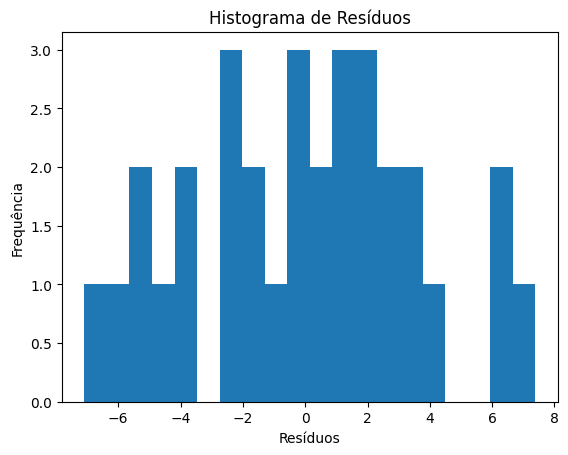

In [37]:
#8. Verificando os resíduos do modelo

residuos = modelo.resid
plt.hist(residuos, bins = 20)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma de Resíduos")
plt.show()


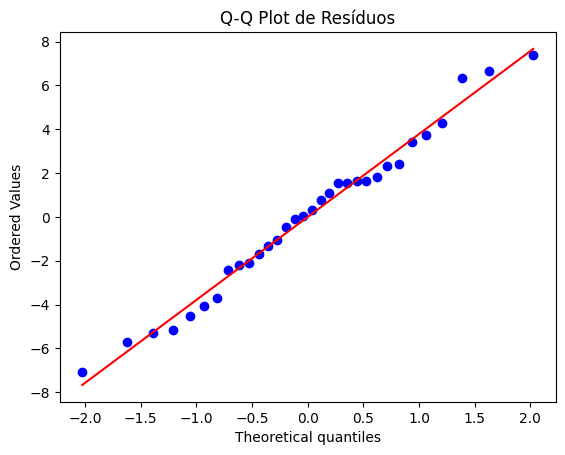

In [38]:
#9. Análise dos Resíduos

stats.probplot(residuos, dist = "norm", plot = plt)
plt.title("Q-Q Plot de Resíduos")
plt.show()


In [40]:
#10. Teste de Shapiro
#p <= 0.0.5 = Não estão normalmente distribuídos
#p > 0.05 = Estão distribuídos normalmente

status, pval = stats.shapiro(residuos)
print(f"Shapiro-Wilk estatística: {status:.3f}, Valor-P: {pval:.3f}")


Shapiro-Wilk estatística: 0.981, Valor-P: 0.822
